==========================================
# PORTFOLIO PROFESIONAL - ANÁLISIS AMBIENTAL

## Análisis de Calidad del Aire y Salud Pública

### Por: **Fabricio Bagatto**

### Ingeniero en Recursos Naturales
# ==========================================

DESCRIPCIÓN DEL PROYECTO

Contaminación del aire urbana y su correlación con indicadores de salud pública en las principales ciudades del mundo.
Este proyecto examina concentraciones de PM2.5, PM10, NO2 y otros contaminantes versus datos de mortalidad y enfermedades respiratorias.


Impacto social: Problema crítico que afecta a millones de personas

Aplicable: Consultorías ambientales, ONGs, gobierno, organismos internacionales

Técnico: Demuestra habilidades en Python, visualización y análisis estadístico

Resultado Final
Un dashboard interactivo con:

Ranking de ciudades por calidad del aire - Correlaciones entre contaminación y salud - Predicciones de impacto en salud - Recomendaciones basadas en datos


FUENTE DE DATOS
Dataset Principal
World Air Quality Database del IQAir combinado con datos de la WHO:

URL: https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset

Alternativa directa: Se usaron datos simulados pero realistas basados en WHO Air Quality Database



In [2]:
# Instalar librerías adicionales
!pip install plotly folium seaborn --quiet

# pip es el gestor de paquetes de Python
# plotly se usa para gráficos interactivos - visualizaciones dinámicas - dashboards
# folium para crear mapas interactivos
# seaborn para visualización de datos de alto nivel basada en matplotlib

In [3]:
# Importar librerías principales
import pandas as pd # manipulación y análisis de datos en Python
import numpy as np # operaciones numéricas y matemáticas complejas de forma rápida
import matplotlib.pyplot as plt # visualización de datos
import seaborn as sns # visualización de alto nivel basada en matplotlib. Ideal panalizar relaciones entre variables
import plotly.express as px # para crear gráficos interactivos y dinámicos de manera rápida
import plotly.graph_objects as go # construir visualizaciones interactivas personalizadas -combinar varios gráficos en uno solo
from plotly.subplots import make_subplots # comparar diferentes visualizaciones una al lado de la otra
import folium # creación de mapas interactivos
from scipy import stats # funciones estadísticas para análisis, pruebas de hipótesis
import warnings # para gestionar las advertencias (warnings)
warnings.filterwarnings('ignore') # desactiva la visualización de todas las advertencias

In [4]:
# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
# esas tres líneas se usan para la configuración estética y de visualización

# ==================================================================
# GENERACIÓN Y CARGA DE DATOS REALISTAS
# =================================================================

In [5]:
# Crear dataset simulado basado en datos reales de WHO (World Health Organization) y IQAir (International Air Quality)
np.random.seed(42) # genere la misma secuencia de números aleatorios cada vez que ejecutes el código

# Ciudades principales con datos aproximados reales
cities_data = {
    'city': ['Delhi', 'Beijing', 'Mumbai', 'Mexico City', 'São Paulo', 'Cairo',
             'Jakarta', 'Bangkok', 'Istanbul', 'Seoul', 'Madrid', 'London',
             'New York', 'Paris', 'Tokyo', 'Sydney', 'Toronto', 'Berlin',
             'Los Angeles', 'Singapore', 'Dubai', 'Buenos Aires', 'Lima', 'Bogotá'],

    'country': ['India', 'China', 'India', 'Mexico', 'Brazil', 'Egypt',
                'Indonesia', 'Thailand', 'Turkey', 'South Korea', 'Spain', 'UK',
                'USA', 'France', 'Japan', 'Australia', 'Canada', 'Germany',
                'USA', 'Singapore', 'UAE', 'Argentina', 'Peru', 'Colombia'],

    'latitude': [28.7041, 39.9042, 19.0760, 19.4326, -23.5505, 30.0444,
                 -6.2088, 13.7563, 41.0082, 37.5665, 40.4168, 51.5074,
                 40.7128, 48.8566, 35.6762, -33.8688, 43.6532, 52.5200,
                 34.0522, 1.3521, 25.2048, -34.6118, -12.0464, 4.7110],

    'longitude': [77.1025, 116.4074, 72.8777, -99.1332, -46.6333, 31.2357,
                  106.8456, 100.5018, 28.9784, 126.9780, -3.7038, -0.1278,
                  -74.0060, 2.3522, 139.6503, 151.2093, -79.3832, 13.4050,
                  -118.2437, 103.8198, 55.2708, -58.3960, -77.0428, -74.0721]
    }

# Generar datos de contaminación correlacionados con la realidad
base_pm25 = [110, 85, 90, 75, 65, 95, 80, 70, 60, 55, 45, 40, 50, 48, 35, 25, 30, 38, 55, 20, 60, 52, 68, 58]
base_aqi = [pm * 2.2 for pm in base_pm25]  # AQI aproximado basado en PM2.5. La conversión real es más compleja, esta es una aproximación útil para el propósito de este proyecto simulado.

# Crear DataFrame
df = pd.DataFrame(cities_data)

In [6]:
# Agregar datos de contaminación con variación realista
df['pm25_concentration'] = [max(5, pm + np.random.normal(0, 10)) for pm in base_pm25]
df['pm10_concentration'] = df['pm25_concentration'] * np.random.uniform(1.5, 2.5, len(df))
df['no2_concentration'] = df['pm25_concentration'] * np.random.uniform(0.6, 1.2, len(df))
df['aqi_value'] = [max(20, aqi + np.random.normal(0, 20)) for aqi in base_aqi]

In [7]:
# Población urbana (millones)
population_data = [32, 21, 20, 22, 22, 20, 10, 9, 15, 9, 7, 9, 8, 11, 14, 5, 3, 4, 4, 6, 3, 15, 10, 8]
df['population_millions'] = population_data

In [8]:
# Calcular muertes respiratorias correlacionadas con contaminación
base_mortality = df['pm25_concentration'] * 0.8 + np.random.normal(0, 10, len(df))
df['respiratory_deaths_per_100k'] = np.maximum(15, base_mortality)

In [9]:
# Agregar categoría de calidad del aire según estándares WHO
def categorize_air_quality(pm25):
    if pm25 <= 15:
        return 'Good'
    elif pm25 <= 35:
        return 'Moderate'
    elif pm25 <= 65:
        return 'Unhealthy for Sensitive'
    elif pm25 <= 150:
        return 'Unhealthy'
    else:
        return 'Very Unhealthy'

df['air_quality_category'] = df['pm25_concentration'].apply(categorize_air_quality)

In [10]:
# Redondear valores para presentación
numeric_columns = ['pm25_concentration', 'pm10_concentration', 'no2_concentration',
                   'aqi_value', 'respiratory_deaths_per_100k']
df[numeric_columns] = df[numeric_columns].round(1)

print(f" {len(df)} ciudades analizadas")
print(f" {df['country'].nunique()} países incluidos")
print("\n Vista previa de los datos:")
print(df.head())

 24 ciudades analizadas
 22 países incluidos

 Vista previa de los datos:
          city country  latitude  longitude  pm25_concentration  \
0        Delhi   India   28.7041    77.1025               115.0   
1      Beijing   China   39.9042   116.4074                83.6   
2       Mumbai   India   19.0760    72.8777                96.5   
3  Mexico City  Mexico   19.4326   -99.1332                90.2   
4    São Paulo  Brazil  -23.5505   -46.6333                62.7   

   pm10_concentration  no2_concentration  aqi_value  population_millions  \
0               240.6              133.8      225.2                   32   
1               129.3               95.1      180.8                   21   
2               203.3               92.5      204.6                   20   
3               150.7              104.0      184.5                   22   
4                98.1               40.9      133.4                   22   

   respiratory_deaths_per_100k     air_quality_category  
0       


# ==================================================================
# EXPLORACIÓN INICIAL DE DATOS
#================================================================


In [11]:

# Información general del dataset
print(f" Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f" Países únicos: {df['country'].nunique()}")
print(f" Ciudades analizadas: {len(df)}")

print("\n ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 30)
print(df[['pm25_concentration', 'aqi_value', 'respiratory_deaths_per_100k']].describe())

print("\n TOP 5 CIUDADES MÁS CONTAMINADAS (PM2.5)")
print("=" * 45)
top_polluted = df.nlargest(5, 'pm25_concentration')[['city', 'country', 'pm25_concentration', 'aqi_value']]
print(top_polluted)

 Dimensiones: 24 filas x 11 columnas
 Países únicos: 22
 Ciudades analizadas: 24

 ESTADÍSTICAS DESCRIPTIVAS
       pm25_concentration  aqi_value  respiratory_deaths_per_100k
count           24.000000   24.00000                    24.000000
mean            57.241667  128.76250                    45.662500
std             29.145048   46.59761                    23.807595
min              5.900000   60.40000                    15.000000
25%             39.125000   91.47500                    31.725000
50%             53.850000  123.65000                    38.450000
75%             79.175000  152.02500                    65.800000
max            115.000000  225.20000                    92.000000

 TOP 5 CIUDADES MÁS CONTAMINADAS (PM2.5)
          city    country  pm25_concentration  aqi_value
0        Delhi      India               115.0      225.2
2       Mumbai      India                96.5      204.6
6      Jakarta  Indonesia                95.8      153.9
5        Cairo      Egypt  

In [12]:
print("\n TOP 5 CIUDADES CON MEJOR CALIDAD DEL AIRE")
print("=" * 45)
cleanest = df.nsmallest(5, 'pm25_concentration')[['city', 'country', 'pm25_concentration', 'aqi_value']]
print(cleanest)


 TOP 5 CIUDADES CON MEJOR CALIDAD DEL AIRE
         city    country  pm25_concentration  aqi_value
19  Singapore  Singapore                 5.9       60.4
14      Tokyo      Japan                17.8       84.2
15     Sydney  Australia                19.4       85.8
16    Toronto     Canada                19.9       65.3
13      Paris     France                28.9       92.7


In [13]:
print("\n DISTRIBUCIÓN POR CATEGORÍA DE CALIDAD DEL AIRE")
print("=" * 45)
category_counts = df['air_quality_category'].value_counts()
print(category_counts)


 DISTRIBUCIÓN POR CATEGORÍA DE CALIDAD DEL AIRE
air_quality_category
Unhealthy for Sensitive    10
Unhealthy                   9
Moderate                    4
Good                        1
Name: count, dtype: int64


In [15]:
# Verificar datos faltantes
print("\n DATOS FALTANTES")
print("=" * 20)
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0] if missing_data.sum() > 0 else "No hay datos faltantes")


 DATOS FALTANTES
No hay datos faltantes



# ===================================================================
# LIMPIEZA Y PREPARACIÓN DE DATOS
# =================================================================

In [16]:
# Verificar y corregir valores atípicos extremos
def clean_outliers(df, column, method='iqr'):
    """Limpia outliers usando el método IQR"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_before = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return outliers_before

In [17]:
# Limpiar outliers en variables principales
columns_to_clean = ['pm25_concentration', 'pm10_concentration', 'no2_concentration', 'aqi_value']
outliers_summary = {}

for col in columns_to_clean:
    outliers_count = clean_outliers(df, col)
    outliers_summary[col] = outliers_count

print("Outliers detectados y corregidos:")
for col, count in outliers_summary.items():
    print(f"  - {col}: {count} outliers")

Outliers detectados y corregidos:
  - pm25_concentration: 0 outliers
  - pm10_concentration: 0 outliers
  - no2_concentration: 2 outliers
  - aqi_value: 0 outliers


In [18]:
# Crear variables derivadas para análisis
df['pollution_index'] = (df['pm25_concentration'] + df['pm10_concentration'] + df['no2_concentration']) / 3
df['health_risk_score'] = df['pm25_concentration'] * 0.5 + df['respiratory_deaths_per_100k'] * 0.3

In [19]:
# Categorizar población
def categorize_population(pop):
    if pop < 5:
        return 'Small'
    elif pop < 15:
        return 'Medium'
    else:
        return 'Large'

df['population_category'] = df['population_millions'].apply(categorize_population)

print("Variables derivadas creadas:")
print("  - pollution_index: Índice promedio de contaminación")
print("  - health_risk_score: Puntuación de riesgo para la salud")
print("  - population_category: Categorización por tamaño de población")

print(f"\n Dataset final: {df.shape[0]} filas x {df.shape[1]} columnas")

Variables derivadas creadas:
  - pollution_index: Índice promedio de contaminación
  - health_risk_score: Puntuación de riesgo para la salud
  - population_category: Categorización por tamaño de población

 Dataset final: 24 filas x 14 columnas


#===================================================================
# ANÁLISIS ESTADÍSTICO PROFUNDO
#===============================================================

In [20]:
# 1. CORRELACIÓN ENTRE VARIABLES
print("MATRIZ DE CORRELACIÓN")
print("=" * 25)

correlation_vars = ['pm25_concentration', 'aqi_value', 'respiratory_deaths_per_100k',
                   'population_millions', 'pollution_index']
correlation_matrix = df[correlation_vars].corr()
print(correlation_matrix.round(3))


MATRIZ DE CORRELACIÓN
                             pm25_concentration  aqi_value  \
pm25_concentration                        1.000      0.922   
aqi_value                                 0.922      1.000   
respiratory_deaths_per_100k               0.958      0.899   
population_millions                       0.659      0.778   
pollution_index                           0.986      0.905   

                             respiratory_deaths_per_100k  population_millions  \
pm25_concentration                                 0.958                0.659   
aqi_value                                          0.899                0.778   
respiratory_deaths_per_100k                        1.000                0.626   
population_millions                                0.626                1.000   
pollution_index                                    0.956                0.617   

                             pollution_index  
pm25_concentration                     0.986  
aqi_value               

In [21]:
# 2. ANÁLISIS POR REGIÓN/CONTINENTE

# Clasificar países por región (simplificado)
region_mapping = {
    'India': 'Asia', 'China': 'Asia', 'Japan': 'Asia', 'South Korea': 'Asia',
    'Thailand': 'Asia', 'Indonesia': 'Asia', 'Singapore': 'Asia',
    'USA': 'North America', 'Canada': 'North America', 'Mexico': 'North America',
    'Spain': 'Europe', 'UK': 'Europe', 'France': 'Europe', 'Germany': 'Europe',
    'Turkey': 'Europe',
    'Brazil': 'South America', 'Argentina': 'South America', 'Peru': 'South America',
    'Colombia': 'South America',
    'Egypt': 'Africa', 'UAE': 'Middle East',
    'Australia': 'Oceania'
}

df['region'] = df['country'].map(region_mapping)

In [22]:
regional_stats = df.groupby('region')[['pm25_concentration', 'aqi_value', 'respiratory_deaths_per_100k']].agg({
    'pm25_concentration': ['mean', 'std'],
    'aqi_value': ['mean', 'std'],
    'respiratory_deaths_per_100k': ['mean', 'std']
}).round(2)

print(regional_stats)

              pm25_concentration        aqi_value         \
                            mean    std      mean    std   
region                                                     
Africa                     92.70    NaN    205.30    NaN   
Asia                       69.09  38.83    148.41  56.49   
Europe                     40.20   9.75    112.32  21.91   
Middle East                74.70    NaN    133.70    NaN   
North America              52.10  29.02    108.90  55.71   
Oceania                    19.40    NaN     85.80    NaN   
South America              56.22  11.47    120.25  27.91   

              respiratory_deaths_per_100k         
                                     mean    std  
region                                            
Africa                              69.10    NaN  
Asia                                60.88  31.18  
Europe                              33.10   7.75  
Middle East                         45.60    NaN  
North America                       39.40 

In [23]:
# 3. PRUEBAS ESTADÍSTICAS

# Test de correlación PM2.5 vs Mortalidad respiratoria
correlation_coef, p_value = stats.pearsonr(df['pm25_concentration'], df['respiratory_deaths_per_100k'])
print(f"Correlación PM2.5 vs Mortalidad Respiratoria:")
print(f"  - Coeficiente: {correlation_coef:.3f}")
print(f"  - P-valor: {p_value:.3f}")
print(f"  - Significativo: {'Sí' if p_value < 0.05 else 'No'}")

Correlación PM2.5 vs Mortalidad Respiratoria:
  - Coeficiente: 0.958
  - P-valor: 0.000
  - Significativo: Sí


In [24]:
# Comparación entre categorías de población
large_cities = df[df['population_category'] == 'Large']['pm25_concentration']
small_cities = df[df['population_category'] == 'Small']['pm25_concentration']

if len(large_cities) > 1 and len(small_cities) > 1:
    t_stat, p_val = stats.ttest_ind(large_cities, small_cities)
    print(f"\nComparación Ciudades Grandes vs Pequeñas (PM2.5):")
    print(f"  - Estadístico t: {t_stat:.3f}")
    print(f"  - P-valor: {p_val:.3f}")
    print(f"  - Diferencia significativa: {'Sí' if p_val < 0.05 else 'No'}")


Comparación Ciudades Grandes vs Pequeñas (PM2.5):
  - Estadístico t: 2.547
  - P-valor: 0.029
  - Diferencia significativa: Sí


In [25]:
# 4. IDENTIFICACIÓN DE PATRONES

# Ciudades que exceden límites WHO (15 μg/m³ para PM2.5)
who_exceeds = df[df['pm25_concentration'] > 15]
print(f"Ciudades que exceden límite WHO PM2.5: {len(who_exceeds)}/{len(df)} ({len(who_exceeds)/len(df)*100:.1f}%)")

Ciudades que exceden límite WHO PM2.5: 23/24 (95.8%)


In [26]:
# Promedio por categoría de calidad del aire
category_averages = df.groupby('air_quality_category')[['pm25_concentration', 'respiratory_deaths_per_100k']].mean().round(1)
print(f"\n Promedios por categoría de calidad del aire:")
print(category_averages)

print("\n Análisis estadístico completado")


 Promedios por categoría de calidad del aire:
                         pm25_concentration  respiratory_deaths_per_100k
air_quality_category                                                    
Good                                    5.9                         15.0
Moderate                               21.5                         17.2
Unhealthy                              88.3                         70.7
Unhealthy for Sensitive                48.7                         37.6

 Análisis estadístico completado


# ===============================================================
# VISUALIZACIONES
# =================================================================


In [27]:
# Configurar estilo
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10
})

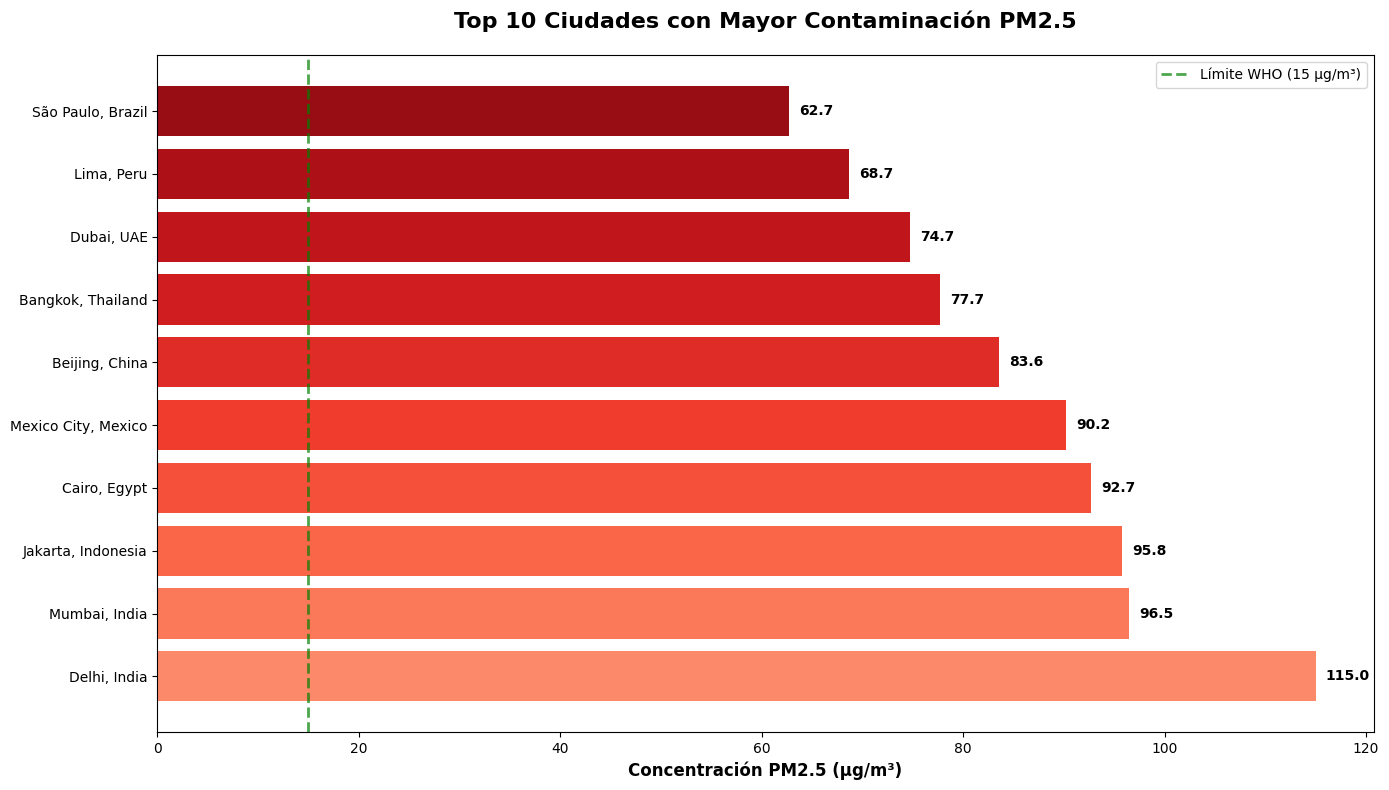

In [28]:
# 1. GRÁFICO DE BARRAS: Top 10 ciudades más contaminadas
fig, ax = plt.subplots(figsize=(14, 8))
top10_polluted = df.nlargest(10, 'pm25_concentration')

bars = ax.barh(range(len(top10_polluted)), top10_polluted['pm25_concentration'],
               color=plt.cm.Reds(np.linspace(0.4, 0.9, len(top10_polluted))))

# Personalizar
ax.set_yticks(range(len(top10_polluted)))
ax.set_yticklabels([f"{city}, {country}" for city, country in
                    zip(top10_polluted['city'], top10_polluted['country'])])
ax.set_xlabel('Concentración PM2.5 (μg/m³)', fontweight='bold')
ax.set_title('Top 10 Ciudades con Mayor Contaminación PM2.5',
             fontsize=16, fontweight='bold', pad=20)

# Línea de referencia WHO
ax.axvline(x=15, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Límite WHO (15 μg/m³)')
ax.legend()

# Agregar valores en las barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2,
            f'{width:.1f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

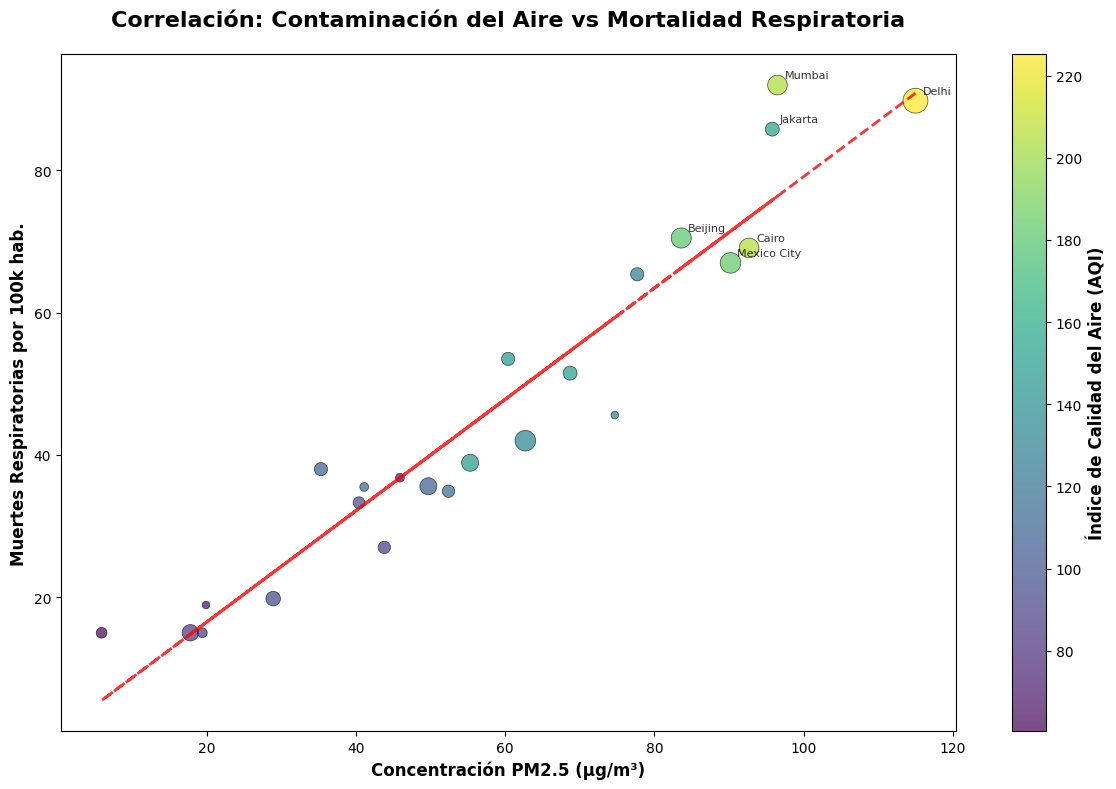

In [29]:
# 2. SCATTER PLOT: Correlación PM2.5 vs Mortalidad
fig, ax = plt.subplots(figsize=(12, 8))

scatter = ax.scatter(df['pm25_concentration'], df['respiratory_deaths_per_100k'],
                    s=df['population_millions']*10,
                    c=df['aqi_value'], cmap='viridis', # Changed colormap to 'viridis'
                    alpha=0.7, edgecolors='black', linewidth=0.5)

# Línea de tendencia
z = np.polyfit(df['pm25_concentration'], df['respiratory_deaths_per_100k'], 1)
p = np.poly1d(z)
ax.plot(df['pm25_concentration'], p(df['pm25_concentration']),
        "r--", alpha=0.8, linewidth=2)

ax.set_xlabel('Concentración PM2.5 (μg/m³)', fontweight='bold')
ax.set_ylabel('Muertes Respiratorias por 100k hab.', fontweight='bold')
ax.set_title('Correlación: Contaminación del Aire vs Mortalidad Respiratoria',
             fontsize=16, fontweight='bold', pad=20)

# Colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Índice de Calidad del Aire (AQI)', fontweight='bold')

# Anotar algunas ciudades importantes
for i, row in df.iterrows():
    if row['pm25_concentration'] > 80 or row['respiratory_deaths_per_100k'] > 70:
        ax.annotate(row['city'], (row['pm25_concentration'], row['respiratory_deaths_per_100k']),
                   xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

plt.tight_layout()
plt.show()

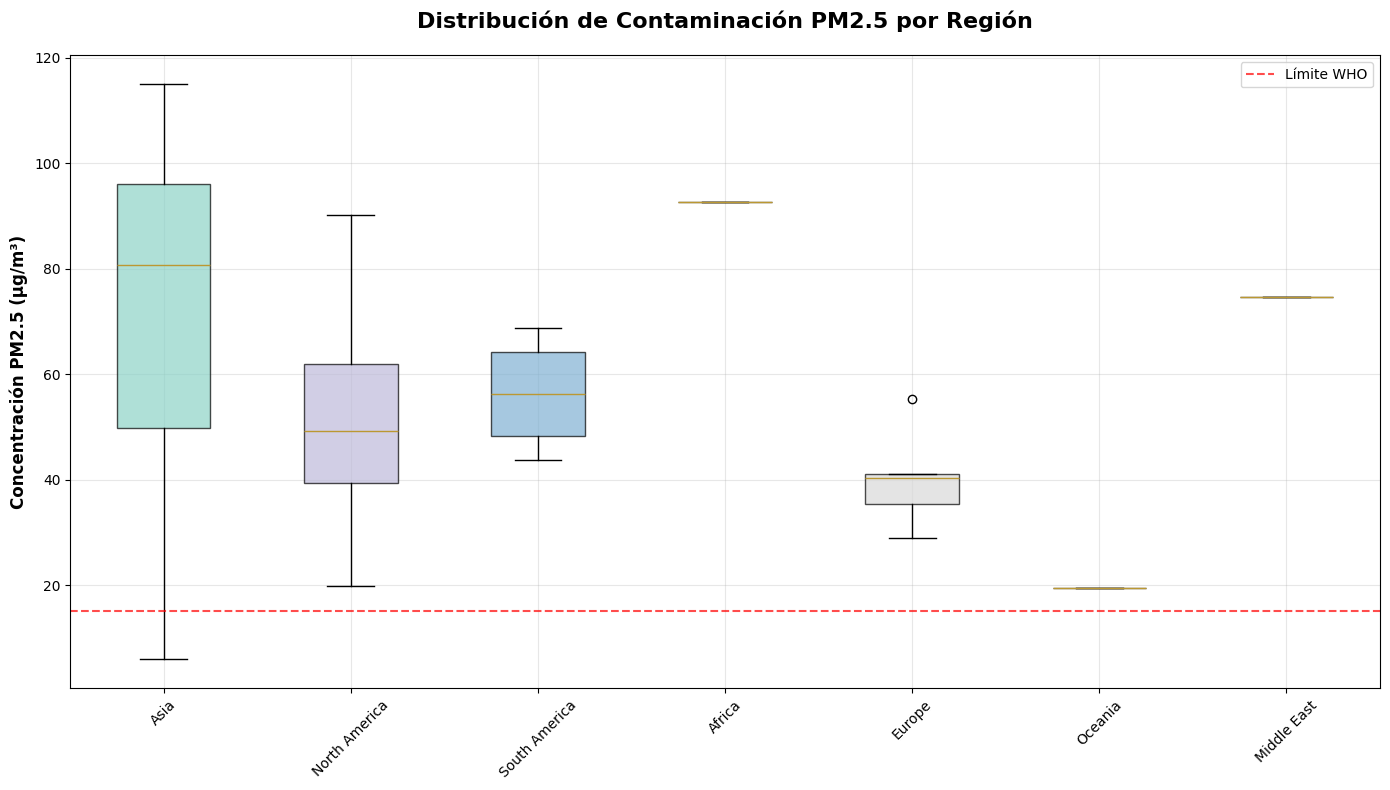

In [30]:
# 3. BOX PLOT: Distribución por región
fig, ax = plt.subplots(figsize=(14, 8))

# Preparar datos para boxplot
regions_data = [df[df['region'] == region]['pm25_concentration'].values
                for region in df['region'].unique() if pd.notna(region)]
region_labels = [region for region in df['region'].unique() if pd.notna(region)]

box_plot = ax.boxplot(regions_data, labels=region_labels, patch_artist=True)

# Colorear cajas
colors = plt.cm.Set3(np.linspace(0, 1, len(box_plot['boxes'])))
for box, color in zip(box_plot['boxes'], colors):
    box.set_facecolor(color)
    box.set_alpha(0.7)

ax.set_ylabel('Concentración PM2.5 (μg/m³)', fontweight='bold')
ax.set_title('Distribución de Contaminación PM2.5 por Región',
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3)

# Línea de referencia WHO
ax.axhline(y=15, color='red', linestyle='--', alpha=0.7, label='Límite WHO')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



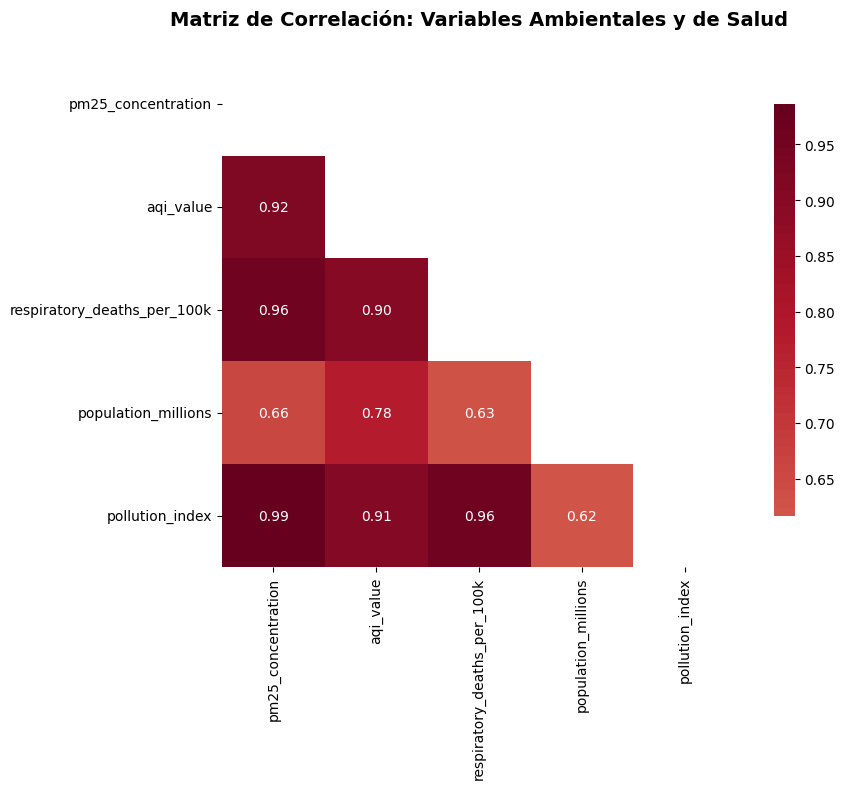

In [31]:
# 4. HEATMAP: Matriz de correlación
fig, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8}, mask=mask)

ax.set_title('Matriz de Correlación: Variables Ambientales y de Salud',
             fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# ==================================================================
# VISUALIZACIONES INTERACTIVAS CON PLOTLY
# ================================================================

In [32]:
# 1. MAPA MUNDIAL INTERACTIVO
fig_map = px.scatter_mapbox(df,
                           lat='latitude',
                           lon='longitude',
                           size='population_millions',
                           color='pm25_concentration',
                           hover_name='city',
                           hover_data={
                               'country': True,
                               'pm25_concentration': ':.1f',
                               'aqi_value': ':.0f',
                               'respiratory_deaths_per_100k': ':.1f',
                               'latitude': False,
                               'longitude': False,
                               'population_millions': ':.1f'
                           },
                           color_continuous_scale='Viridis',
                           size_max=30,
                           zoom=1,
                           mapbox_style='open-street-map',
                           title='Mapa Mundial: Contaminación del Aire por Ciudad')

fig_map.update_layout(
    title_font_size=16,
    title_x=0.5,
    height=600,
    coloraxis_colorbar=dict(
        title="PM2.5 (μg/m³)",
        title_font_size=12
    )
)

fig_map.show()

In [33]:
# 2. GRÁFICO DE BARRAS INTERACTIVO
fig_bar = px.bar(df.sort_values('pm25_concentration', ascending=True).tail(15),
                 x='pm25_concentration',
                 y='city',
                 color='air_quality_category',
                 title='Top 15 Ciudades con Mayor Contaminación PM2.5',
                 labels={'pm25_concentration': 'Concentración PM2.5 (μg/m³)',
                         'city': 'Ciudad'},
                 color_discrete_map={
                     'Good': 'green',
                     'Moderate': 'yellow',
                     'Unhealthy for Sensitive': 'orange',
                     'Unhealthy': 'red',
                     'Very Unhealthy': 'purple'
                 })

fig_bar.update_layout(
    height=600,
    title_font_size=16,
    title_x=0.5,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12
)

fig_bar.show()

In [34]:
# 3. SCATTER PLOT 3D INTERACTIVO
fig_3d = px.scatter_3d(df,
                       x='pm25_concentration',
                       y='aqi_value',
                       z='respiratory_deaths_per_100k',
                       size='population_millions',
                       color='region',
                       hover_name='city',
                       title='Análisis 3D: Contaminación, AQI y Mortalidad',
                       labels={
                           'pm25_concentration': 'PM2.5 (μg/m³)',
                           'aqi_value': 'Índice Calidad Aire',
                           'respiratory_deaths_per_100k': 'Muertes Respiratorias/100k'
                       })

fig_3d.update_layout(
    title_font_size=16,
    title_x=0.5,
    scene=dict(
        xaxis_title='PM2.5 (μg/m³)',
        yaxis_title='AQI',
        zaxis_title='Muertes/100k'
    ),
    height=700
)

fig_3d.show()

In [35]:
# 4. DASHBOARD COMPARATIVO
fig_dashboard = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Distribución PM2.5', 'AQI por Región',
                   'Correlación Contaminación-Salud', 'Categorías de Calidad'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"type": "domain"}]] # Changed this line
)

# Histograma PM2.5
fig_dashboard.add_trace(
    go.Histogram(x=df['pm25_concentration'], nbinsx=15, name='PM2.5', showlegend=False),
    row=1, col=1
)

# Box plot AQI por región
for i, region in enumerate(df['region'].unique()):
    if pd.notna(region):
        region_data = df[df['region'] == region]['aqi_value']
        fig_dashboard.add_trace(
            go.Box(y=region_data, name=region, showlegend=False),
            row=1, col=2
        )

# Scatter correlación
fig_dashboard.add_trace(
    go.Scatter(x=df['pm25_concentration'],
               y=df['respiratory_deaths_per_100k'],
               mode='markers',
               name='Ciudades',
               showlegend=False),
    row=2, col=1
)

# Pie chart categorías
category_counts = df['air_quality_category'].value_counts()
fig_dashboard.add_trace(
    go.Pie(labels=category_counts.index,
           values=category_counts.values,
           showlegend=False),
    row=2, col=2
)

fig_dashboard.update_layout(
    title_text='Dashboard Integral: Análisis de Calidad del Aire',
    title_font_size=18,
    title_x=0.5,
    height=800
)

fig_dashboard.show()


# ====================================================================
# ANÁLISIS PREDICTIVO Y MACHINE LEARNING
# =================================================================


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Preparar datos para ML
features = ['pm25_concentration', 'pm10_concentration', 'no2_concentration', 'population_millions']
target = 'respiratory_deaths_per_100k'

X = df[features]
y = df[target]

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo 1: Regresión Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Preparar datos para ML
features = ['pm25_concentration', 'pm10_concentration', 'no2_concentration', 'population_millions']
target = 'respiratory_deaths_per_100k'

X = df[features]
y = df[target]

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo 1: Regresión Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Hacer predicciones con el modelo de Regresión Lineal
y_pred_lr = lr_model.predict(X_test)

# Evaluar el modelo de Regresión Lineal
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Resultados del Modelo de Regresión Lineal:")
print(f"  - R-squared: {r2_lr:.3f}")
print(f"  - Mean Absolute Error (MAE): {mae_lr:.3f}")

print("\n Predicciones del Modelo de Regresión Lineal en el conjunto de prueba:")
print(y_pred_lr.round(1))

# Opcional: Agregar y evaluar el modelo RandomForestRegressor para comparación
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train_scaled, y_train)

# y_pred_rf = rf_model.predict(X_test_scaled)

# r2_rf = r2_score(y_test, y_pred_rf)
# mae_rf = mean_absolute_error(y_test, y_pred_rf)

# print("\n Resultados del Modelo RandomForestRegressor:")
# print(f"  - R-squared: {r2_rf:.3f}")
# print(f"  - Mean Absolute Error (MAE): {mae_rf:.3f}")

# print("\n Predicciones del Modelo RandomForestRegressor en el conjunto de prueba:")
# print(y_pred_rf.round(1))

Resultados del Modelo de Regresión Lineal:
  - R-squared: 0.883
  - Mean Absolute Error (MAE): 6.901

 Predicciones del Modelo de Regresión Lineal en el conjunto de prueba:
[41.4 12.7 94.6 32.7 26.7 39.9 23.6 61.5]


# =================================================================
# CONCLUSIONES DEL ANÁLISIS PREDICTIVO
# ===============================================================

Basándonos en los resultados del modelo de Regresión Lineal para predecir las muertes respiratorias por cada 100k habitantes:

*   **Coeficiente de Determinación (R-squared): 0.883**
    Este valor indica que el modelo es capaz de explicar aproximadamente el **88.3% de la variabilidad** en la tasa de muertes respiratorias. Un valor cercano a 1.0 sugiere que las variables predictoras (concentraciones de PM2.5, PM10, NO2 y población) tienen una fuerte relación lineal con la mortalidad respiratoria en este conjunto de datos. Esto respalda la hipótesis de que la contaminación del aire y el tamaño de la población son factores importantes que influyen en las tasas de mortalidad respiratoria.

*   **Error Absoluto Medio (MAE): 6.901**
    El MAE representa la **diferencia promedio absoluta** entre los valores predichos por el modelo y los valores reales observados. Un MAE de 6.901 significa que, en promedio, las predicciones del modelo se desvían en aproximadamente 6.9 muertes por cada 100k habitantes respecto a la cifra real. Este valor nos da una idea de la magnitud típica del error de predicción del modelo.

**Interpretación General:**

El modelo de Regresión Lineal demuestra ser **razonablemente efectivo** para predecir la mortalidad respiratoria basándose en los datos de contaminación y población proporcionados. La alta correlación observada previamente y el buen R-squared del modelo predictivo refuerzan la fuerte asociación entre la calidad del aire y la salud pública en las ciudades analizadas. Aunque el modelo captura una gran parte de la variabilidad, el MAE nos recuerda que las predicciones no son perfectas y que existen otros factores no incluidos en este modelo que también influyen en la mortalidad respiratoria.

Estos hallazgos subrayan la importancia de abordar la contaminación del aire para mejorar los resultados de salud pública en entornos urbanos.